In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## The Categorical Cross-Entropy Loss Class
In the later chapters, we’ll be adding more loss functions and some of the operations that we’ll be
performing are common for all of them. One of these operations is how we calculate the overall
loss — no matter which loss function we’ll use, the overall loss is always a mean value of all
sample losses. Let’s create the ​ Loss​ class containing the ​ calculate​ method that will call our
loss object’s forward method and calculate the mean value of the returned sample losses:

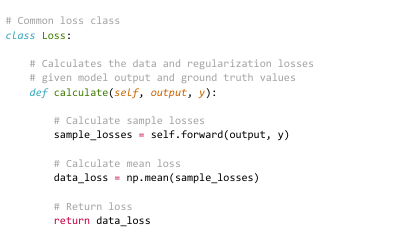
In later chapters, we’ll add more code to this class, and the reason for it to exist will become more
clear. For now, we’ll use it for this single purpose.
In later chapters, we’ll add more code to this class, and the reason for it to exist will become more
clear. For now, we’ll use it for this single purpose.

Let’s convert our loss code into a class for convenience down the line:

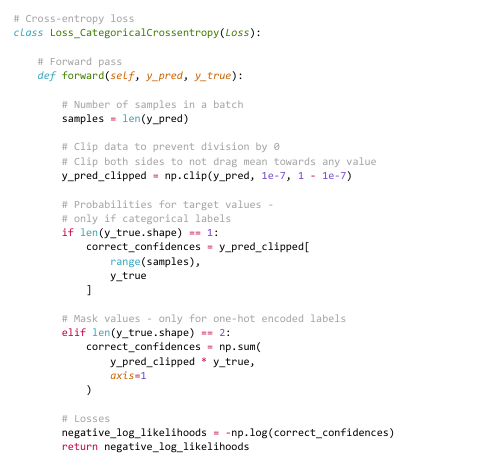
This class inherits the ​ Loss​ class and performs all the error calculations that we derived
throughout this chapter and can be used as an object. For example, using the manually-created
output and targets:
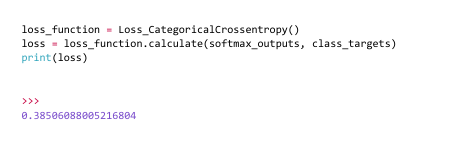

In [ ]:
## Steps
### Spiral_data: 
Creates a 2D dataset for classification into 3 classes.

### Layer_Dense: 
Implements a fully connected layer with weights and biases initialized using random values, followed by the forward pass calculation.

### Activation_ReLU: 
Implements the ReLU activation function, which sets negative inputs to zero.

### Activation_Softmax: 

Implements the Softmax activation function, which converts the input into probability distributions for multi-class classification.

### Loss_CategoricalCrossentropy: 

Implements the categorical cross-entropy loss function, which measures the difference between the predicted and true probability distributions.

In [1]:
import numpy as np

# Function to create spiral data (similar to nnfs)
def spiral_data(samples, classes):
    X = np.zeros((samples * classes, 2))  # Input features
    y = np.zeros(samples * classes, dtype='uint8')  # Class labels
    for class_number in range(classes):
        ix = range(samples * class_number, samples * (class_number + 1))
        r = np.linspace(0.0, 1, samples)  # Radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, samples) + np.random.randn(samples) * 0.2  # Theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_number
    return X, y

# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

# Cross-entropy loss
class Loss_CategoricalCrossentropy:
    # Forward pass to calculate loss
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        # Clip data to prevent division by 0
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values for categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Calculate the mean loss
    def calculate(self, y_pred, y_true):
        sample_losses = self.forward(y_pred, y_true)
        data_loss = np.mean(sample_losses)
        return data_loss

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
dense2.forward(activation1.output)

# Perform a forward pass through activation function
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print("Output of softmax activation (first 5 samples):")
print(activation2.output[:5])

# Perform a forward pass through loss function and calculate loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print(f'Loss: {loss}')


Output of softmax activation (first 5 samples):
[[0.33333333 0.33333333 0.33333333]
 [0.33333331 0.33333336 0.33333333]
 [0.3333332  0.33333337 0.33333343]
 [0.33333325 0.3333334  0.33333335]
 [0.33333322 0.33333343 0.33333334]]
Loss: 1.0986086245524613


Again, we get ​ ~0.33 ​ values since the model is random, and its average loss is also not great for
these data, as we’ve not yet trained our model on how to correct its errors.

## Accuracy Calculation
While loss is a useful metric for optimizing a model, the metric commonly used in practice along
with loss is the ​ accuracy​ , which describes how often the largest confidence is the correct class
in terms of a fraction. Conveniently, we can reuse existing variable definitions to calculate the
accuracy metric. We will use the ​ argmax ​ values from the ​ softmax outputs a ​ nd then compare
these to the targets. This is as simple as doing (note that we slightly modified the
softmax_outputs​ for the purpose of this example):
    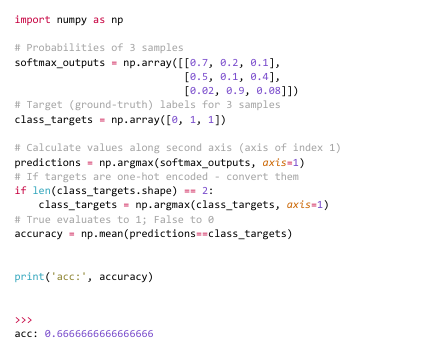
    
 We are also handling one-hot encoded targets by converting them to sparse values using
np.argmax()​ .
We can add the following to the end of our full script above to calculate its accuracy:
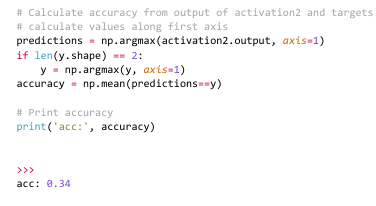
Now that you’ve learned how to perform a forward pass through our network and calculate the
metrics to signal if the model is performing poorly, we will embark on optimization in the next
chapter!